Chapter Three Exercise Solutions: Classification, this is perhaps the only thing I was confident about about in Machine Learning prior to the full time self-study.

In [1]:
# The Common Modules
import os
import numpy as np

# Making the notebook's output stable across runs
np.random.seed(42)

# Plotting pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# MNIST

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'details', 'categories', 'url'])

In [3]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [4]:
X[0].shape

(784,)

In [5]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

# plotting an example from the mnist data set
def plot_digit(digit):
    a_digit = digit.reshape(28, 28)
    plt.imshow(a_digit, cmap=mpl.cm.binary, 
               interpolation="nearest")
    plt.axis("off")

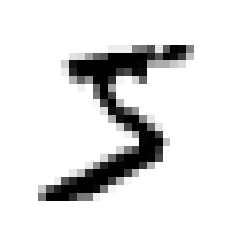

In [6]:
plot_digit(X[0])

In [10]:
# Train and test sets
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

1: Try to build a classifier for the MNIST dataset that achieves over 97% accuracy
on the test set. Hint: the KNeighborsClassifier works quite well for this task;
you just need to find good hyperparameter values (try a grid search on the
weights and n_neighbors hyperparameters).

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.utils import shuffle

# The parameters to search through.
parameters = [{
    'n_neighbors': shuffle([1, 2, 4, 8]),
    'weights'    : shuffle(['uniform', 'distance'])
}]

KNN = KNeighborsClassifier()
GSCV = GridSearchCV(KNN, param_grid=parameters, cv=5, verbose=3)

In [11]:
# GSCV.fit(X_train, y_train)
# Runs for about a day (1532 mins)

In [12]:
# GSCV.best_params_

In [13]:
# GSCV.best_score_

In [14]:
# from sklearn.metrics import accuracy_score
# y_predict = GSCV.predict(X_test)
# accuracy_score(y_test, y_predict)

2: Write a function that can shift an MNIST image in any direction (left, right, up,
or down) by one pixel. Then, for each image in the training set, create four shifted 
copies (one per direction) and add them to the training set. Finally, train your
best model on this expanded training set and measure its accuracy on the test set.
You should observe that your model performs even better now! This technique of
artificially growing the training set is called data augmentation or training set
expansion

In [7]:
from scipy.ndimage.interpolation import shift

In [12]:
# This was completely new to me.
def shift_digit(digit, down, right):
    """
    down,  the value by which a point is moved on the given axis,
           (negative, is up)
    right, the value by which a point is moved right, (negative is
           left).
    """
    digit = digit.reshape(28, 28)
    shifted_digit = shift(digit, [down, right], cval=0.0, mode="constant")
    return shifted_digit.reshape([-1])

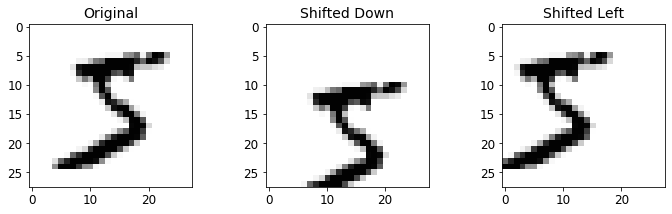

In [11]:
image = X_train[0]
shift_down = shift_digit(image, 5, 0)
shift_left = shift_digit(image, 0, -5)
shift_up = shift_digit(image, -5, 0)

plt.figure(figsize=(12, 3))
plt.subplot(131)
plt.title("Original", fontsize=14)
plt.imshow(image.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(132)
plt.title("Shifted Down", fontsize=14)
plt.imshow(shift_down.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(133)
plt.title("Shifted Left", fontsize=14)
plt.imshow(shift_left.reshape(28, 28), interpolation="nearest", cmap="Greys")
#plt.subplot(231)
#plt.title("Shifted Up", fontsize=14)
#plt.imshow(shift_up.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.show()

In [18]:
X_train_augmented = [image for image in X_train]
y_train_augmented = [label for label in y_train]

In [19]:
len(X_train), len(X_train_augmented)

(60000, 60000)

In [20]:
for dx, dy in ((1, 0), (-1, 0), (0, -1), (0, 1)):
    for image, label in zip(X_train, y_train):
        X_train_augmented.append(shift_digit(image, dx, dy))
        y_train_augmented.append(laberrrl)

In [21]:
X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)

In [ ]:
shuffle_idx = np.random.permutation(len(X_train_augmented)) # Returns a randomly shuffled list.
X_train_augmented = X_train_augmented[shuffle_idx]
y_train_augmented = y_train_augmented[shuffle_idx]

In [ ]:
# augmKNN = KNN(**GSCV.best_params_)

In [ ]:
# augmKNN.fit(X_train_augmented, y_train_augmented)

In [1]:
# augmKNN.predict(X_test)

3: Tackle the Titanic dataset. A great place to start is on Kaggle.

In [22]:
import os
import pandas as pd
ROOT_FOLDER = "datasets/Titanic-Dataset"

In [23]:
# Fetch the data
def loadData(filename):
    path = os.path.join(ROOT_FOLDER, filename)
    return pd.read_csv(path)

In [24]:
# + filenames
#  - train.csv
#  - test.csv

train = loadData('train.csv')
test = loadData('test.csv')

In [25]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [26]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [27]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [28]:
# + Observations
#  - Missing Values (Imputer for classification?)
#  - Non-numerical data
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [30]:
# Categoricals
cats = list(train.columns[train.dtypes == object])
cats

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [41]:
survived = train["Survived"].copy()
y_train = survived

In [54]:
# Drop the cabin column, only 22% values included.
x_train = train.drop(["Survived","Cabin"], axis=1)
x_train.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [55]:
# Percentage representation for cabin column
204/891

0.22895622895622897

In [57]:
# Categoricals
cats = list(x_train.columns[x_train.dtypes == object])
cats

['Name', 'Sex', 'Ticket', 'Embarked']

In [62]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
PassengerId    891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


In [65]:
x_train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [72]:
#transformer = ColumnTransformer([
#    ('num', num_trans, list(x_train_num)),
#    ('encoder', OneHotEncoder(), list(x_train_cat))
#])

In [67]:
# x_train_trans = transformer.fit_transform(x_train)
# Conundrum: how do I impute categorical values??

Use custom classes.

In [71]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, features):
        self.feature_names = features
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.feature_names]

In [130]:
class CategoricalImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.most_frequent = pd.Series([X[c].value_counts().index[0] for c in X],
                                      index=X.columns)
        return self
    def transform(self, X, y=None):
        return X.fillna(self.most_frequent)

In [144]:
# Drop useless data (imo), for starters
# + Name
# + Ticket
# + Cabin (22% values included)
# https://towardsdatascience.com/7-data-types-a-better-way-to-think-about-data-types-for-machine-learning-939fae99a689
# This particular cell caters for models that work with numerical data only

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

# seperate numerical and categorical data
# x_train_num = x_train.drop(cats, axis=1)
# x_train_cat = x_train[["Sex", "Embarked", "Pclass"]] # Dropped columns; Cabin, Ticket, Name

num_feats = ["Age", "SibSp", "Parch", "Fare"]
cat_feats = ["Pclass", "Sex", "Embarked"]

num_trans = Pipeline([
    #('selector', DataFrameSelector(["Age", "SibSp", "Parch", "Fare"])),
    ('imputer', SimpleImputer(strategy="median")),
    ('scaler', StandardScaler()),
])

cat_trans = Pipeline([
    #('cats', DataFrameSelector(["Pclass", "Sex", "Embarked"])), # Instead of hard-coding the columns
    ('cat_impute', CategoricalImputer()),                       # could supply a list.
    ('one_hot', OneHotEncoder(sparse=False))
])

transformer = ColumnTransformer([
    ('numerical', num_trans, num_feats),
    ('categorical', cat_trans, cat_feats)
])

In [145]:
x_train_trans = transformer.fit_transform(x_train)
x_train_trans

array([[-0.56573646,  0.43279337, -0.47367361, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.66386103,  0.43279337, -0.47367361, ...,  1.        ,
         0.        ,  0.        ],
       [-0.25833709, -0.4745452 , -0.47367361, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.1046374 ,  0.43279337,  2.00893337, ...,  0.        ,
         0.        ,  1.        ],
       [-0.25833709, -0.4745452 , -0.47367361, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.20276197, -0.4745452 , -0.47367361, ...,  0.        ,
         1.        ,  0.        ]])

In [146]:
# It works
chr(0x1F609)

'😉'

Now, the predictions. I shall use four algorithms.
* SGDClassifier
* Random Forest Classifier
* Decision Tree Classifiers
* XGBoost

In [147]:
# SGDClassifier
from sklearn.linear_model import SGDClassifier
SGD = SGDClassifier()
SGD.fit(x_train_trans, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [148]:
# transformer
x_test_trans = transformer.fit_transform(test)
x_test_trans

array([[ 0.38623105, -0.49947002, -0.4002477 , ...,  0.        ,
         1.        ,  0.        ],
       [ 1.37137004,  0.61699237, -0.4002477 , ...,  0.        ,
         0.        ,  1.        ],
       [ 2.55353683, -0.49947002, -0.4002477 , ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.70147553, -0.49947002, -0.4002477 , ...,  0.        ,
         0.        ,  1.        ],
       [-0.20485235, -0.49947002, -0.4002477 , ...,  0.        ,
         0.        ,  1.        ],
       [-0.20485235,  0.61699237,  0.61989583, ...,  1.        ,
         0.        ,  0.        ]])

In [149]:
y_pred = SGD.predict(x_test_trans)

In [152]:
y_pred;

In [190]:
# Cross-validation score
from sklearn.model_selection import cross_val_score
sgd_scores = cross_val_score(SGD, x_train_trans, y_train, cv=10)
sgd_scores.mean()
# Scaling improves the score by 3% (What?!)

0.762192429917149

In [168]:
# DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier(max_depth=3)
DTC.fit(x_train_trans, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [191]:
dtc_scores = cross_val_score(DTC, x_train_trans, y_train, cv=10)
dtc_scores.mean()
# Much better than the SGDClassifier

0.8159002950856884

In [157]:
# Unscaled features
num_trans_un = Pipeline([
    #('selector', DataFrameSelector(["Age", "SibSp", "Parch", "Fare"])),
    ('imputer', SimpleImputer(strategy="median")),
    #('scaler', StandardScaler()),
])

cat_trans = Pipeline([
    #('cats', DataFrameSelector(["Pclass", "Sex", "Embarked"])), # Instead of hard-coding the columns
    ('cat_impute', CategoricalImputer()),                       # could supply a list.
    ('one_hot', OneHotEncoder(sparse=False))
])

transformer_un = ColumnTransformer([
    ('numerical', num_trans, num_feats),
    ('categorical', cat_trans, cat_feats)
])

x_train_un = transformer_un.fit_transform(x_train)

In [166]:
# Reducing the max_depth improves the score
unDTC = DecisionTreeClassifier(max_depth=3)
unDTC.fit(x_train_un, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [167]:
# score unscaled
scores = cross_val_score(unDTC, x_train_un, y_train, cv=10)
scores.mean()

0.8159002950856884

In [181]:
# RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators=160, max_leaf_nodes=15, random_state=42)
RFC.fit(x_train_trans, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=15,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=160,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [192]:
rfc_scores = cross_val_score(RFC, x_train_trans, y_train, cv=10)
rfc_scores.mean()
# GridsearchCV advised

0.8249267960503917

In [186]:
unRFC = RandomForestClassifier(n_estimators=160, max_leaf_nodes=15, random_state=42)
unRFC.fit(x_train_un, y_train)
scores = cross_val_score(unRFC, x_train_un, y_train, cv=10)
scores.mean()

0.8249267960503917

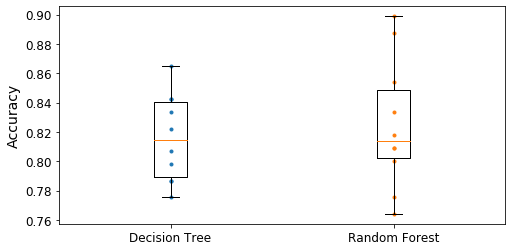

In [201]:
plt.figure(figsize=(8, 4))
plt.plot([1]*10, dtc_scores, ".")
plt.plot([2]*10, rfc_scores, ".")
plt.boxplot([dtc_scores, rfc_scores], labels=("Decision Tree","Random Forest"))
plt.ylabel("Accuracy", fontsize=14)
plt.show()

**Kaggle Submission, My first actually.**

In [187]:
# Writing to the submission file
predictions = RFC.predict(x_test_trans)
output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


**Kaggle score is 0.76555**,
I can definately do better

In [189]:
# Feature Engineering is very important.
chr(0x1F610)

'😐'

4: Build a spam classifier based on the examples of spam and ham from Apache SpamAssassin’s public
datasets.

In [1]:
# So much to learn especially python manipulation of the web.
import os
import tarfile
import urllib

DOWNLOAD_URL = "http://spamassassin.apache.org/old/publiccorpus/"
HAM_URL = DOWNLOAD_URL + "20030228_easy_ham.tar.bz2"
SPAM_URL = DOWNLOAD_URL + "20030228_spam.tar.bz2"
SPAM_PATH = os.path.join("datasets", "spam")

def fetch_spam(spam_url=SPAM_URL, spam_path=SPAM_PATH):
    # Make directory
    if not os.path.isdir(spam_path):
        os.makedirs(spam_path)
    
    for filename, url in (("ham.tar.bz2", HAM_URL), ("spam.tar.bz2", SPAM_URL)):
        path = os.path.join(spam_path, filename)
        if not os.path.isfile(path): # Check if file already exists
            urllib.request.urlretrieve(url, path) # if not, download file
        tar_bz2_file = tarfile.open(path)
        tar_bz2_file.extractall(path=SPAM_PATH) # extract the files from the tar folders
        tar_bz2_file.close()

In [2]:
fetch_spam()

In [3]:
# Load the emails
ham_dir = os.path.join(SPAM_PATH, "easy_ham")
spam_dir = os.path.join(SPAM_PATH, "spam")

# os.listdir(ham_dir); list all filenames
ham_filenames = [name for name in sorted(os.listdir(ham_dir)) if len(name) > 20]
spam_filenames = [name for name in sorted(os.listdir(spam_dir)) if len(name) > 20]

In [4]:
len(ham_filenames), len(spam_filenames)

(2500, 500)

In [5]:
# introduce, python email module
import email
import email.policy

def load_email(is_spam, filename, spam_path=SPAM_PATH):
    directory = "spam" if is_spam else "easy_ham"
    with open(os.path.join(spam_path, directory, filename), "rb") as f:
        return email.parser.BytesParser(policy=email.policy.default).parse(f)

In [6]:
email.parser.BytesParser?

In [8]:
ham_emails = [load_email(is_spam=False, filename=name) for name in ham_filenames]
spam_emails = [load_email(is_spam=True, filename=name) for name in spam_filenames]

In [9]:
type(ham_emails[1])

email.message.EmailMessage

In [10]:
print(ham_emails[5].get_content().strip())

> I just had to jump in here as Carbonara is one of my favourites to make and 
> ask 
> what the hell are you supposed to use instead of cream? 

Isn't it just basically a mixture of beaten egg and bacon (or pancetta, 
really)? You mix in the raw egg to the cooked pasta and the heat of the pasta 
cooks the egg. That's my understanding.

Martin

------------------------ Yahoo! Groups Sponsor ---------------------~-->
4 DVDs Free +s&p Join Now
http://us.click.yahoo.com/pt6YBB/NXiEAA/mG3HAA/7gSolB/TM
---------------------------------------------------------------------~->

To unsubscribe from this group, send an email to:
forteana-unsubscribe@egroups.com

 

Your use of Yahoo! Groups is subject to http://docs.yahoo.com/info/terms/


In [11]:
print(spam_emails[4].get_content().strip())

I thought you might like these:
1) Slim Down - Guaranteed to lose 10-12 lbs in 30 days
http://www.freeyankee.com/cgi/fy2/to.cgi?l=822slim1

2) Fight The Risk of Cancer! 
http://www.freeyankee.com/cgi/fy2/to.cgi?l=822nic1 

3) Get the Child Support You Deserve - Free Legal Advice 
http://www.freeyankee.com/cgi/fy2/to.cgi?l=822ppl1

Offer Manager
Daily-Deals








If you wish to leave this list please use the link below.
http://www.qves.com/trim/?social@linux.ie%7C29%7C134077


-- 
Irish Linux Users' Group Social Events: social@linux.ie
http://www.linux.ie/mailman/listinfo/social for (un)subscription information.
List maintainer: listmaster@linux.ie


In [13]:
def get_email_structure(email):
    if isinstance(email, str):
        return email
    payload = email.get_payload()
    if isinstance(payload, list):
        return "multipart({})".format(
            ",".join([
                get_email_structure(sub_email) # Recursion
                for sub_email in payload
            ])
        )
    else:
        return email.get_content_type()

In [14]:
from collections import Counter

def structures_counter(emails):
    structures = Counter()
    for email in emails:
        structure = get_email_structure(email)
        structures[structure] += 1
    return structures

In [15]:
structures_counter(ham_emails).most_common()

[('text/plain', 2408),
 ('multipart(text/plain,application/pgp-signature)', 66),
 ('multipart(text/plain,text/html)', 8),
 ('multipart(text/plain,text/plain)', 4),
 ('multipart(text/plain)', 3),
 ('multipart(text/plain,application/octet-stream)', 2),
 ('multipart(text/plain,text/enriched)', 1),
 ('multipart(text/plain,application/ms-tnef,text/plain)', 1),
 ('multipart(multipart(text/plain,text/plain,text/plain),application/pgp-signature)',
  1),
 ('multipart(text/plain,video/mng)', 1),
 ('multipart(text/plain,multipart(text/plain))', 1),
 ('multipart(text/plain,application/x-pkcs7-signature)', 1),
 ('multipart(text/plain,multipart(text/plain,text/plain),text/rfc822-headers)',
  1),
 ('multipart(text/plain,multipart(text/plain,text/plain),multipart(multipart(text/plain,application/x-pkcs7-signature)))',
  1),
 ('multipart(text/plain,application/x-java-applet)', 1)]

In [16]:
structures_counter(spam_emails).most_common()

[('text/plain', 218),
 ('text/html', 183),
 ('multipart(text/plain,text/html)', 45),
 ('multipart(text/html)', 20),
 ('multipart(text/plain)', 19),
 ('multipart(multipart(text/html))', 5),
 ('multipart(text/plain,image/jpeg)', 3),
 ('multipart(text/html,application/octet-stream)', 2),
 ('multipart(text/plain,application/octet-stream)', 1),
 ('multipart(text/html,text/plain)', 1),
 ('multipart(multipart(text/html),application/octet-stream,image/jpeg)', 1),
 ('multipart(multipart(text/plain,text/html),image/gif)', 1),
 ('multipart/alternative', 1)]

In [20]:
# spam ~ text/html, no PGP-sign
# ham ~ text/plain, PGP-sign

spam_emails[2].items();

for header, value in spam_emails[2].items():
    print(header,":", value)

Return-Path : <sabrina@mx3.1premio.com>
Delivered-To : zzzz@localhost.spamassassin.taint.org
Received : from localhost (localhost [127.0.0.1])	by phobos.labs.spamassassin.taint.org (Postfix) with ESMTP id 1E90847C66	for <zzzz@localhost>; Thu, 22 Aug 2002 09:44:02 -0400 (EDT)
Received : from mail.webnote.net [193.120.211.219]	by localhost with POP3 (fetchmail-5.9.0)	for zzzz@localhost (single-drop); Thu, 22 Aug 2002 14:44:03 +0100 (IST)
Received : from email.qves.com (email1.qves.net [209.63.151.251] (may be forged))	by webnote.net (8.9.3/8.9.3) with ESMTP id OAA04953	for <zzzz@spamassassin.taint.org>; Thu, 22 Aug 2002 14:37:23 +0100
Received : from qvp0086 ([169.254.6.17]) by email.qves.com with Microsoft SMTPSVC(5.0.2195.2966);	 Thu, 22 Aug 2002 07:36:20 -0600
From : Slim Down <sabrina@mx3.1premio.com>
To : zzzz@spamassassin.taint.org
Subject : Guaranteed to lose 10-12 lbs in 30 days                          11.150
Date : Thu, 22 Aug 2002 07:36:19 -0600
Message-ID : <9a63c01c249e0$e5a

In [23]:
spam_emails[2]["Subject"] # Fishy subjects

'Guaranteed to lose 10-12 lbs in 30 days                          11.150'

Creating the test set.

In [24]:
import numpy as np
from sklearn.model_selection import train_test_split

X = np.array(ham_emails + spam_emails)
y = np.array([0] * len(ham_emails) + [1] * len(spam_emails))

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Email preprocessing

In [37]:
import re
from html import unescape

# re.M makes $ match the end of a line(not just the end of a string) 
#      ^ match the start of any line, not just the string
# re.S makes a period match any character including a newline
# re.I performs case-insentive matching


def html_to_plain_text(html):
    text = re.sub('<head.*?>.*?</head>', '', html, flags=re.M | re.S | re.I)
    text = re.sub('<a\s.*?>', ' HYPERLINK ', text, flags=re.M | re.S | re.I)
    text = re.sub('<.*?>', '', text, flags=re.M | re.S)
    text = re.sub(r'(\s*\n)+', '\n', text, flags=re.M | re.S)
    return unescape(text)

In [38]:
# Example
html_spam_emails = [email for email in X_train[y_train==1]
                    if get_email_structure(email) == "text/html"]
sample_html_spam = html_spam_emails[7]
print(sample_html_spam.get_content().strip()[:1000], "...")

<HTML><HEAD><TITLE></TITLE><META http-equiv="Content-Type" content="text/html; charset=windows-1252"><STYLE>A:link {TEX-DECORATION: none}A:active {TEXT-DECORATION: none}A:visited {TEXT-DECORATION: none}A:hover {COLOR: #0033ff; TEXT-DECORATION: underline}</STYLE><META content="MSHTML 6.00.2713.1100" name="GENERATOR"></HEAD>
<BODY text="#000000" vLink="#0033ff" link="#0033ff" bgColor="#CCCC99"><TABLE borderColor="#660000" cellSpacing="0" cellPadding="0" border="0" width="100%"><TR><TD bgColor="#CCCC99" valign="top" colspan="2" height="27">
<font size="6" face="Arial, Helvetica, sans-serif" color="#660000">
<b>OTC</b></font></TD></TR><TR><TD height="2" bgcolor="#6a694f">
<font size="5" face="Times New Roman, Times, serif" color="#FFFFFF">
<b>&nbsp;Newsletter</b></font></TD><TD height="2" bgcolor="#6a694f"><div align="right"><font color="#FFFFFF">
<b>Discover Tomorrow's Winners&nbsp;</b></font></div></TD></TR><TR><TD height="25" colspan="2" bgcolor="#CCCC99"><table width="100%" border="0" 

In [39]:
print(html_to_plain_text(sample_html_spam.get_content())[:1000], "...")


OTC
 Newsletter
Discover Tomorrow's Winners 
For Immediate Release
Cal-Bay (Stock Symbol: CBYI)
Watch for analyst "Strong Buy Recommendations" and several advisory newsletters picking CBYI.  CBYI has filed to be traded on the OTCBB, share prices historically INCREASE when companies get listed on this larger trading exchange. CBYI is trading around 25 cents and should skyrocket to $2.66 - $3.25 a share in the near future.
Put CBYI on your watch list, acquire a position TODAY.
REASONS TO INVEST IN CBYI
A profitable company and is on track to beat ALL earnings estimates!
One of the FASTEST growing distributors in environmental & safety equipment instruments.
Excellent management team, several EXCLUSIVE contracts.  IMPRESSIVE client list including the U.S. Air Force, Anheuser-Busch, Chevron Refining and Mitsubishi Heavy Industries, GE-Energy & Environmental Research.
RAPIDLY GROWING INDUSTRY
Industry revenues exceed $900 million, estimates indicate that there could be as much as $25 billi

In [40]:
def email_to_text(email):
    html = None
    for part in email.walk():
        ctype = part.get_content_type()
        if not ctype in ("text/plain", "text/html"):
            continue
        try:
            content = part.get_content()
        except: # in case of encoding issues
            content = str(part.get_payload())
        if ctype == "text/plain":
            return content
        else:
            html = content
    if html:
        return html_to_plain_text(html)

In [41]:
# NLP